In [5]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [42]:
import os 
map_superclass_rev = {'CD': 0, 'HYP': 1, 'MI': 2, 'NORM': 3, 'STTC': 4}
labels = map_superclass_rev.keys()

In [44]:
dict_windows_test_hr = {}
dict_windows_test_lr = {}
dict_windows_train_lr = {}
dict_windows_test_lr_n = {}
dict_windows_train_lr_n = {}
dict_windows_train_hr = {}
path = os.getcwd()+os.sep+"pt_data"+os.sep

for label in labels:

    filename = path + "test_{}_hr.pt".format(label)
    hr_data = torch.load(filename)
    dict_windows_test_hr[label] = hr_data

    filename = path + "test_{}_50.pt".format(label)
    lr_data = torch.load(filename)
    dict_windows_test_lr[label] = lr_data
    
    
    filename = path + "test_{}_noisy.pt".format(label)
    lr_data = torch.load(filename)
    dict_windows_test_lr_n[label] = lr_data

    filename = path + "train_{}_hr.pt".format(label)
    hr_data = torch.load(filename)
    dict_windows_train_hr[label] = hr_data

    filename = path + "train_{}_50.pt".format(label)
    lr_data = torch.load(filename)
    dict_windows_train_lr[label] = lr_data
    
    filename = path + "train_{}_noisy.pt".format(label)
    lr_data = torch.load(filename)
    dict_windows_train_lr_n[label] = lr_data

dict_windows_train = dict_windows_train_lr
dict_windows_test = dict_windows_test_lr

In [24]:
count = 0
for label, values in dict_windows_train_lr_n.items():
    count += len(values)
    print(label, len(values))
count

CD 4160
HYP 2372
MI 9760
NORM 17102
STTC 5066


38460

768 [[768, 384], [192, 12]] [[30, 30], [10, 4]] [[5, 2], [1, 1]]


VAE1d_SR_multimodal(
  (encoder): Encoder1d(
    (encoder): Sequential(
      (0): EncoderBlock1d(
        (conv1d_in): Conv1d(12, 12, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=False)
        (conv1d_out): Conv1d(12, 192, kernel_size=(3,), stride=(1,))
        (activation_out): Tanh()
        (dropout_out): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderBlock1d(
        (conv1d_in): Conv1d(192, 384, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=False)
        (conv1d_out): Conv1d(384, 768, kernel_size=(3,), stride=(1,))
        (activation_out): Tanh()
        (dropout_out): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): Decoder1d(
    (decoder): Sequential(
      (0): DecoderBlock1d(
        (conv1d_in): ConvTranspose1d(768, 768, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=

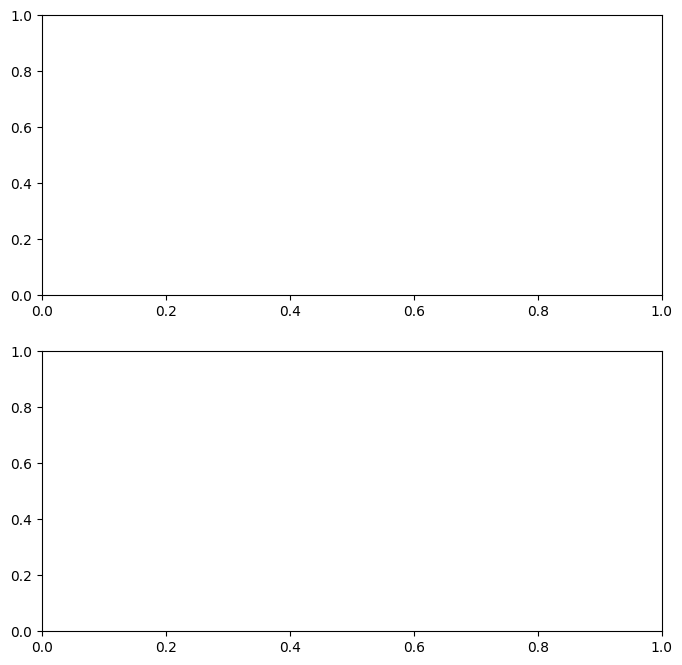

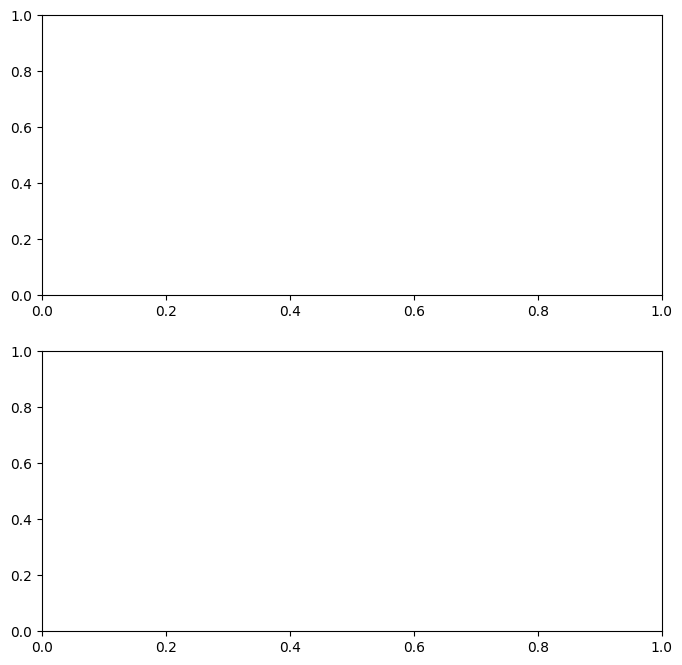

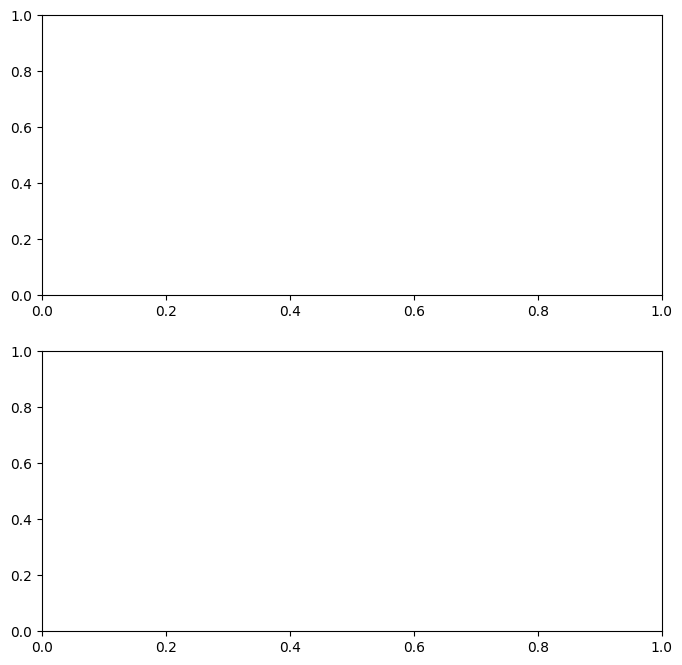

In [60]:
from functions import load_models, load_model
model_all = load_model("models/model_all_denoising_lrhr.pt")
model_all

768 [[768, 384], [192, 12]] [[30, 30], [10, 4]] [[5, 2], [1, 1]]


VAE1d_SR_multimodal(
  (encoder): Encoder1d(
    (encoder): Sequential(
      (0): EncoderBlock1d(
        (conv1d_in): Conv1d(12, 12, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=False)
        (conv1d_out): Conv1d(12, 192, kernel_size=(3,), stride=(1,))
        (activation_out): Tanh()
        (dropout_out): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderBlock1d(
        (conv1d_in): Conv1d(192, 384, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=False)
        (conv1d_out): Conv1d(384, 768, kernel_size=(3,), stride=(1,))
        (activation_out): Tanh()
        (dropout_out): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): Decoder1d(
    (decoder): Sequential(
      (0): DecoderBlock1d(
        (conv1d_in): ConvTranspose1d(768, 768, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=

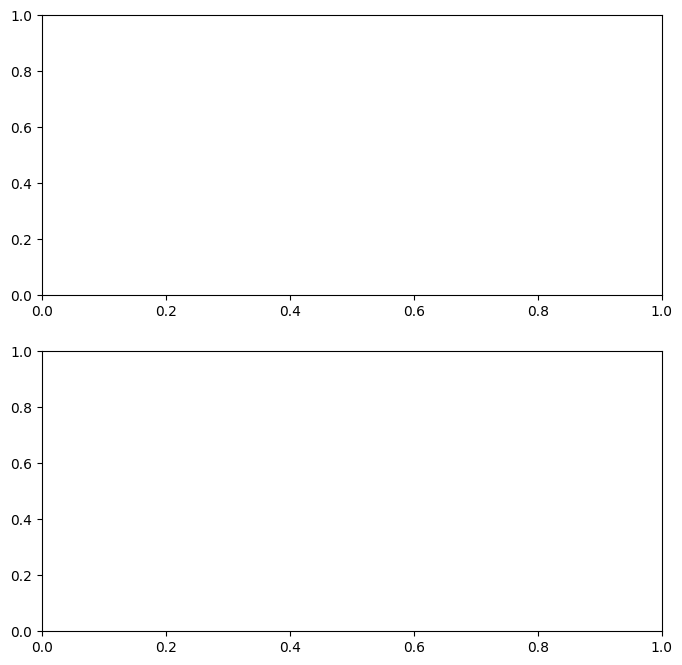

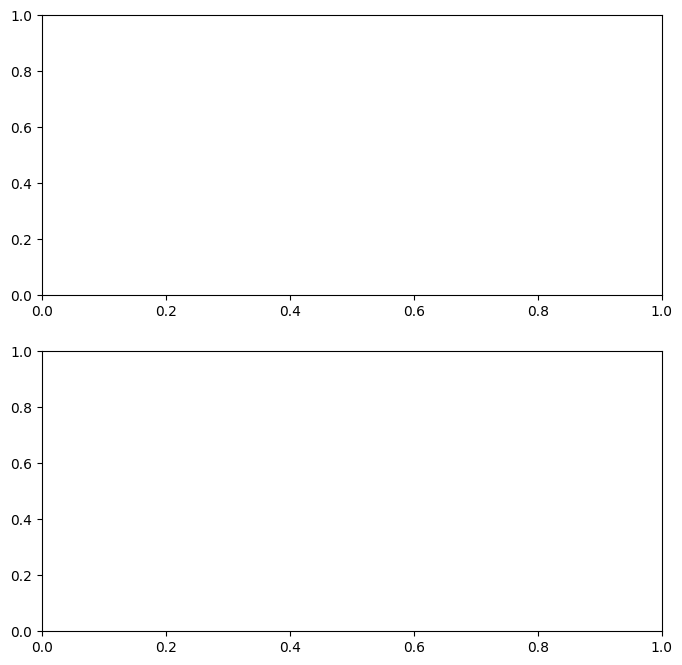

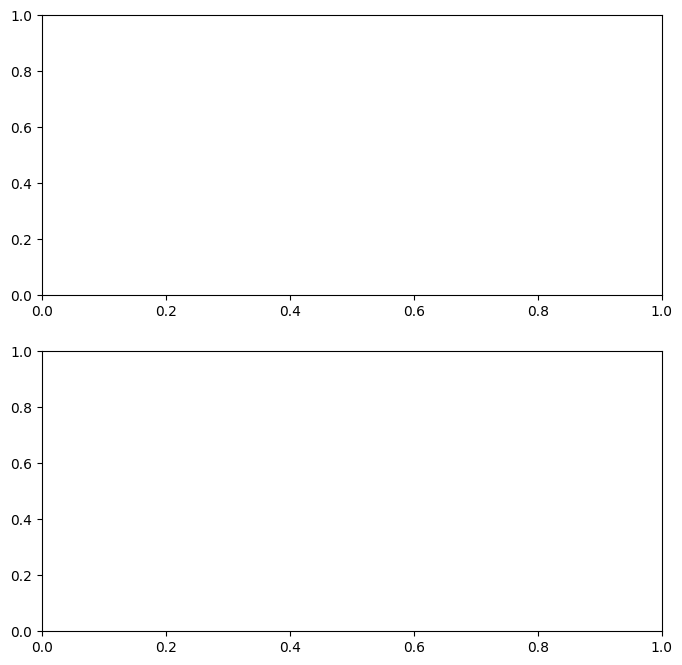

In [58]:
model_mi = load_model("models/model_2_denoising_lrhr.pt")
model_mi

In [63]:
models = {"Original": model_all, "Only MI": model_mi}
models

{'Original': VAE1d_SR_multimodal(
   (encoder): Encoder1d(
     (encoder): Sequential(
       (0): EncoderBlock1d(
         (conv1d_in): Conv1d(12, 12, kernel_size=(3,), stride=(1,))
         (activation_in): Tanh()
         (dropout_in): Dropout(p=0.1, inplace=False)
         (conv1d_out): Conv1d(12, 192, kernel_size=(3,), stride=(1,))
         (activation_out): Tanh()
         (dropout_out): Dropout(p=0.1, inplace=False)
       )
       (1): EncoderBlock1d(
         (conv1d_in): Conv1d(192, 384, kernel_size=(3,), stride=(1,))
         (activation_in): Tanh()
         (dropout_in): Dropout(p=0.1, inplace=False)
         (conv1d_out): Conv1d(384, 768, kernel_size=(3,), stride=(1,))
         (activation_out): Tanh()
         (dropout_out): Dropout(p=0.1, inplace=False)
       )
     )
   )
   (decoder): Decoder1d(
     (decoder): Sequential(
       (0): DecoderBlock1d(
         (conv1d_in): ConvTranspose1d(768, 768, kernel_size=(3,), stride=(1,))
         (activation_in): Tanh()
       

In [68]:
def compute_sr(signals, method, signals_hr = None, nchs = 12):
    signals_sr = []
    n = len(signals)
    for i, signal in enumerate(signals):
        print("\r", i+1, "/", n, end = "")
        signal = signal.cpu().detach().numpy()
        if signals_hr is None:
            signal_sr = method(signal, nchs=nchs)
        else:
            signal_hr = signals_hr[i]
            signals_hr = method(signal, signal_hr, nchs=nchs)
        if isinstance(signal_sr, (np.ndarray, np.generic) ):
            signal_sr = torch.from_numpy(signal_sr)
        signals_sr.append(signal_sr)
    signals_sr = torch.stack(signals_sr)
    width_sr = signals_sr.shape[-1]
    width_lr = signal.shape[-1]
    if method != "our proposed (S)":
        if width_lr == width_sr:
            signals_sr = interpolate_sr(signals_sr)
    return signals_sr

In [71]:
from torch.functional import F
def compute_mse(signals_sr, signals_hr):
    losses = []
    for i, signal_sr in enumerate(signals_sr):
        signal_sr = signal_sr.cpu()
        signal_hr = signals_hr[i].cpu()
        mse_loss = F.mse_loss(signal_sr, signal_hr)
        losses.append(mse_loss.item())
    return losses, np.mean(losses)

In [74]:
def interpolate_sr(signals, fs_lr=50, fs_hr = 500, nchs=12, mode = 'cubic'):
    # Interpolation to 500 Hz
    t_low_res = np.arange(0, 5, 1/fs_lr)
    t_high_res = np.arange(0, 5, 1/fs_hr)  # 500 Hz sampling rate
    signals_sr = []
    for signal in signals:
        f_interp = interpolate.interp1d(t_low_res, signal, kind=mode, fill_value="extrapolate")
        signal_sr = f_interp(t_high_res)
        if isinstance(signal_sr, (np.ndarray, np.generic) ):
            signal_sr = torch.from_numpy(signal_sr)
        signals_sr.append(signal_sr)
    signals_sr = torch.stack(signals_sr)
    return signals_sr

In [78]:
def ssim_2d(signal1, signal2):
    """
    Compute the Structural Similarity Index (SSIM) for two-dimensional signals.

    Parameters:
    - signal1, signal2: Input signals.

    Returns:
    - ssim_index: Structural Similarity Index between the two signals.
    """

    # Ensure the signals have the same shape
    if signal1.shape != signal2.shape:
        raise ValueError("Input signals must have the same shape")

    # Constants for SSIM calculation
    C1 = (0.01 * np.amax(signal1) - np.amin(signal1))**2
    C2 = (0.01 * np.amax(signal2) - np.amin(signal2))**2

    # Mean and variance
    mu1 = np.mean(signal1)
    mu2 = np.mean(signal2)

    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2

    sigma1_sq = np.var(signal1)
    sigma2_sq = np.var(signal2)
    sigma12 = np.cov(signal1.flatten(), signal2.flatten())[0, 1]

    # SSIM calculation
    num = (2 * mu1_mu2 + C1) * (2 * sigma12 + C2)
    den = (mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)

    #print(num, den)
    ssim_index = num / den

    return ssim_index

In [81]:
def compute_ssim(signals_sr, signals_hr):

    ssims = []
    for i, signal_sr in enumerate(signals_sr):
        signal_sr = signal_sr.cpu()
        signal_hr = signals_hr[i].cpu()
        signal_sr = torch.squeeze(signal_sr, dim =0).cpu().detach().numpy()
        signal_hr = torch.squeeze(signal_hr, dim =0).cpu().detach().numpy()
        ssim = ssim_2d(signal_hr, signal_sr)
        ssims.append(ssim)
    return ssims, np.mean(ssims)

In [84]:
def psnr_2d(original, reconstructed):
    """
    Compute Peak Signal-to-Noise Ratio (PSNR) for two-dimensional signals.

    Parameters:
    - original: Original signal.
    - reconstructed: Reconstructed signal.

    Returns:
    - psnr_value: PSNR value between the original and reconstructed signals.
    """

    # Ensure the signals have the same shape
    if original.shape != reconstructed.shape:
        raise ValueError("Input signals must have the same shape")

    # Calculate the mean squared error
    mse = np.mean((original - reconstructed)**2)

    # The maximum possible pixel value (assuming the signal is in the range [0, 1])
    max_pixel_value = 1.0

    # Calculate PSNR
    psnr_value = 10 * np.log10((max_pixel_value**2) / mse)

    return psnr_value

In [87]:
def compute_psnr(signals_hr, signals_sr):

    psnrs = []
    for i, signal_sr in enumerate(signals_sr):
        signal_sr = signal_sr.cpu()
        signal_hr = signals_hr[i].cpu()
        signal_sr = torch.squeeze(signal_sr, dim =0).cpu().detach().numpy()
        signal_hr = torch.squeeze(signal_hr, dim =0).cpu().detach().numpy()
        psnr = psnr_2d(signal_hr, signal_sr)
        psnrs.append(psnr)
    return psnrs, np.mean(psnrs)

In [91]:
def sr_our_proposed_onlysignals(signal, nchs=12):

    global model
    global device
    signal = torch.from_numpy(signal).to(device)
    if signal.ndim == 2:
        signal = signal.unsqueeze(dim = 0)
    if signal.ndim == 3:
        signal = signal.unsqueeze(dim = 0)
    pred = model([signal, None, None, None])
    signal_sr = pred[1]
    if signal_sr.ndim == 2:
        signal_sr = signal_sr.unsqueeze(dim = 0)
    signal_sr = signal_sr.cpu().detach().numpy()
    
    #print(signal_sr.shape)
    del pred
    del signal
    return signal_sr

In [105]:
import numpy as np
import pandas as pd 

df = pd.DataFrame(columns = ["model", "MSE", "SSMI", "PSNR"])
i = 0

for name, model in models.items():

    model.eval()
    model = model.to(device)
    temp_mses = []
    temp_psnrs = []
    temp_ssims = []
    
    for label in labels:
        
        signals_test = dict_windows_test_lr_n[label]
        signals_test_hr = dict_windows_test_hr[label]
        signals_test_sr = compute_sr(signals_test, sr_our_proposed_onlysignals)
        
        #compute mse
        _, mse  = compute_mse(signals_test_sr, signals_test_hr)
        #compute ssmi
        _, ssim = compute_ssim(signals_test_sr, signals_test_hr)
        #compute psnr
        _, psnr = compute_psnr(signals_test_sr, signals_test_hr)
        temp_mses.append(mse)
        temp_psnrs.append(psnr)
        temp_ssims.append(ssim)

    values = [name, np.mean(temp_mses), np.mean(temp_ssims), np.mean(temp_psnrs)]
    df.loc[i] = values
    i+=1

 568 / 56826

In [107]:
df

,model,MSE,SSMI,PSNR
0,Original,0.008304,0.992628,24.124080
1,Only MI,0.008449,0.992083,23.810572
